In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense

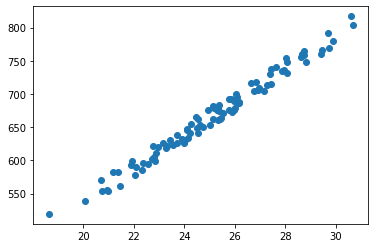

In [2]:
#Generate a random data
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20,50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=['area','price'])
plt.scatter(data['area'], data['price'])
plt.show()

In [3]:
data = (data - data.min()) / (data.max() - data.min())  #Normalize

In [4]:
model = K.Sequential([
                      #normalizer,
                      Dense(1, input_shape = [1,], activation=None)
])
model.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2022-09-17 11:54:39.054598: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-17 11:54:39.055150: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
model.compile(loss='mean_squared_error', optimizer='sgd')

In [6]:
model.fit(x=data['area'],y=data['price'], epochs=100, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/100


2022-09-17 11:54:53.443745: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-17 11:54:53.541067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 39ms/step - loss: 2.0764 - val_loss: 2.4458
Epoch 2/100
3/3 [==============================] - 0s 9ms/step - loss: 1.8034 - val_loss: 2.1541
Epoch 3/100
3/3 [==============================] - 0s 10ms/step - loss: 1.5752 - val_loss: 1.9043
Epoch 4/100
3/3 [==============================] - 0s 10ms/step - loss: 1.3808 - val_loss: 1.6888
Epoch 5/100
3/3 [==============================] - 0s 9ms/step - loss: 1.2127 - val_loss: 1.4922
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 1.0635 - val_loss: 1.3262
Epoch 7/100
3/3 [==============================] - 0s 10ms/step - loss: 0.9376 - val_loss: 1.1776
Epoch 8/100
3/3 [==============================] - 0s 10ms/step - loss: 0.8287 - val_loss: 1.0566
Epoch 9/100
1/3 [=========>....................] - ETA: 0s - loss: 0.8114

2022-09-17 11:54:53.822269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 10ms/step - loss: 0.7385 - val_loss: 0.9490
Epoch 10/100
3/3 [==============================] - 0s 10ms/step - loss: 0.6602 - val_loss: 0.8550
Epoch 11/100
3/3 [==============================] - 0s 10ms/step - loss: 0.5928 - val_loss: 0.7738
Epoch 12/100
3/3 [==============================] - 0s 10ms/step - loss: 0.5345 - val_loss: 0.6971
Epoch 13/100
3/3 [==============================] - 0s 10ms/step - loss: 0.4814 - val_loss: 0.6327
Epoch 14/100
3/3 [==============================] - 0s 9ms/step - loss: 0.4377 - val_loss: 0.5773
Epoch 15/100
3/3 [==============================] - 0s 9ms/step - loss: 0.4000 - val_loss: 0.5274
Epoch 16/100
3/3 [==============================] - 0s 10ms/step - loss: 0.3672 - val_loss: 0.4833
Epoch 17/100
3/3 [==============================] - 0s 9ms/step - loss: 0.3391 - val_loss: 0.4492
Epoch 18/100
3/3 [==============================] - 0s 10ms/step - loss: 0.3172 - val_loss: 0.4179
Epoch 19/100
3/3 [========

3/3 [==============================] - 0s 9ms/step - loss: 0.1344 - val_loss: 0.1235
Epoch 93/100
3/3 [==============================] - 0s 10ms/step - loss: 0.1338 - val_loss: 0.1233
Epoch 94/100
3/3 [==============================] - 0s 9ms/step - loss: 0.1332 - val_loss: 0.1225
Epoch 95/100
3/3 [==============================] - 0s 9ms/step - loss: 0.1327 - val_loss: 0.1220
Epoch 96/100
3/3 [==============================] - 0s 9ms/step - loss: 0.1322 - val_loss: 0.1214
Epoch 97/100
3/3 [==============================] - 0s 9ms/step - loss: 0.1317 - val_loss: 0.1209
Epoch 98/100
3/3 [==============================] - 0s 10ms/step - loss: 0.1312 - val_loss: 0.1203
Epoch 99/100
3/3 [==============================] - 0s 9ms/step - loss: 0.1307 - val_loss: 0.1199
Epoch 100/100
3/3 [==============================] - 0s 9ms/step - loss: 0.1302 - val_loss: 0.1199


In [7]:
y_pred = model.predict(data['area'])

2022-09-17 11:55:12.332022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


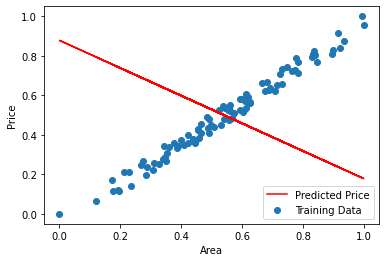

In [8]:
plt.plot(data['area'], y_pred, color='red',label="Predicted Price")
plt.scatter(data['area'], data['price'], label="Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()

In [9]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.33806288]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.68142694], dtype=float32)>]